In [8]:
import pandas as pd
from math import floor
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import Script.Image as Image

## DATA PREPROCESSING

In [2]:
training = pd.read_csv('Training.csv')

#### 1) Dealing with class imbalance

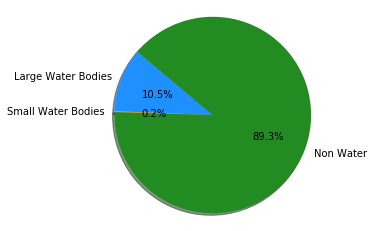

In [3]:
lwb, nw, n_swb = Image.class_piechart(training)

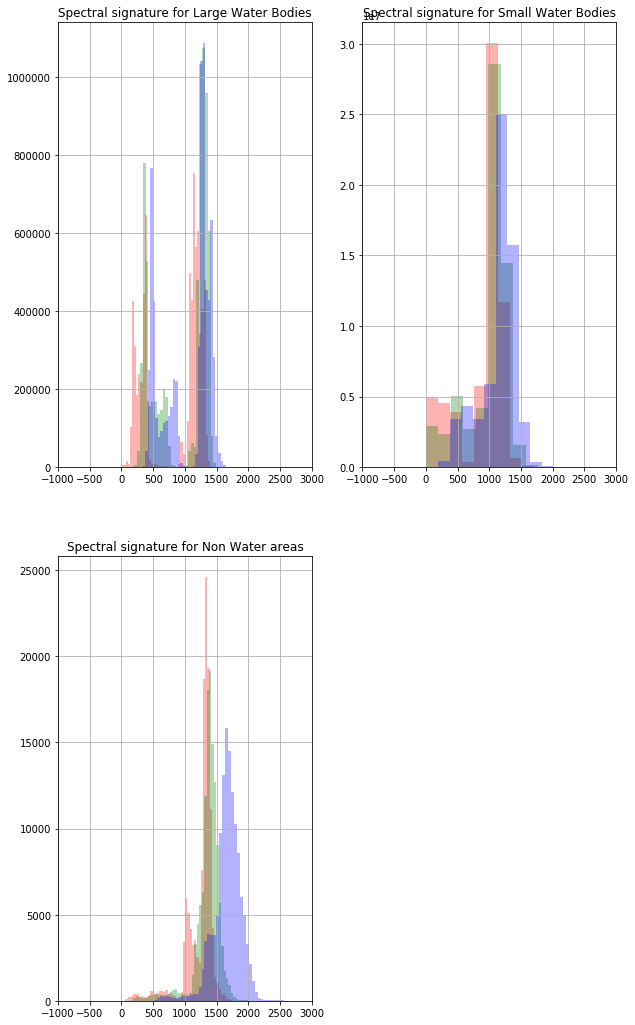

In [9]:
Image.class_spectral_signature(training)

In [10]:
shuf_training = shuffle(training)

In [11]:
lwb = shuf_training.loc[shuf_training['Content'] == 1]
nw = shuf_training.loc[shuf_training['Content'] == 3]

In [12]:
shuf_training = shuf_training.drop(lwb[:n_swb].index)

In [ ]:
shuf_training = shuf_training.drop([nw[:n_swb].index])

In [ ]:
Image.class_piechart(training)